In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
meas = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

session.query(meas.date).order_by(meas.date.desc()).first()

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)
# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data



Query Date:  2016-08-23


In [12]:
stmt = session.query(meas.date, meas.prcp).\
    filter(meas.date >= query_date).statement
prcp_dt = pd.read_sql_query(stmt,session.bind)

prcp_df = pd.DataFrame(prcp_dt)
prcp_df.set_index('date', inplace =True)

prcp_plot = prcp_df.sort_values(by='date')


prcp_plot

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


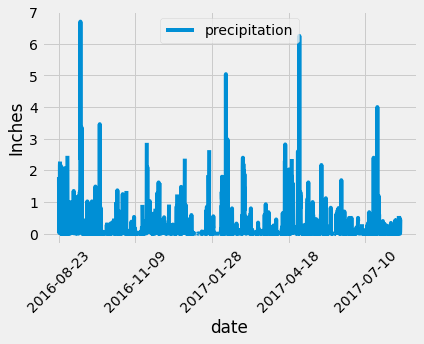

In [39]:
prcp_plot.plot(rot = 45)
#plt.plot(prcp_plot.index.values, prcp_plot.values)

plt.ylabel('Inches')
plt.legend(["precipitation"])
#plt.xticks([('2016-08-23'),('2016-10-01'),('2016-11-09'),('2016-12-19'),('2017-01-28'),('2017-03-09'),('2017-04-18'),('2017-05-31'),('2017-05-31'),('2017-07-10')])
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_plot.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
stmt2 = session.query(meas.station, func.count(meas.station)).\
    group_by(meas.station).\
    order_by(func.count(meas.station).desc()).statement
stat =  pd.read_sql_query(stmt2,session.bind)



In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stat

,station,count_1
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
act_stat = "USC00519281"
sel = [meas.station,func.min(meas.tobs),func.max(meas.tobs),func.avg(meas.tobs)]

analysis = session.query(*sel).\
    filter(meas.station == act_stat).all()
analysis

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stmt3 = session.query(meas.station, meas.tobs, meas.date).\
    filter(meas.date >= query_date).\
    filter(meas.station == act_stat).statement

results = pd.read_sql_query(stmt3,session.bind)
results



,station,tobs,date
0,USC00519281,77.0,2016-08-23
1,USC00519281,77.0,2016-08-24
2,USC00519281,80.0,2016-08-25
3,USC00519281,80.0,2016-08-26
4,USC00519281,75.0,2016-08-27
...,...,...,...
347,USC00519281,77.0,2017-08-14
348,USC00519281,77.0,2017-08-15
349,USC00519281,76.0,2017-08-16
350,USC00519281,76.0,2017-08-17


<function matplotlib.pyplot.show(*args, **kw)>

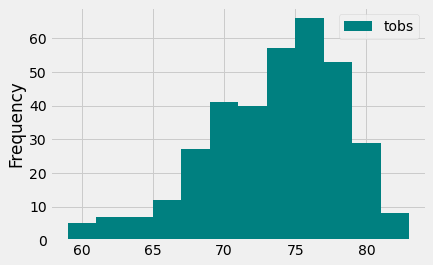

In [19]:
results.plot(kind = 'hist', grid = 'true', color = 'teal', bins = 12)
plt.show

# Close session

In [20]:
# Close Session
session.close()